# Check water extent S1 images

##### This code read S1 images, clips them to the AOI, applies a speckle filter and then create a water mask using a threshold based on visual inspection

### Author: Miguel Chapela Rivas

### Library imports

In [1]:
import shapely
import shapely.wkt
from function_for_exercie import clip_image_to_aoi,get_water_mask,speckle_filter
import matplotlib.pyplot as plt
import rasterio

### Input parameters

In [2]:
aoi_str = "POLYGON((-5.626262643661826 39.89116380127936,-5.313838937607138 39.89116380127936,-5.313838937607138 39.75404898715227,-5.626262643661826 39.75404898715227,-5.626262643661826 39.89116380127936))"
aoi = shapely.wkt.loads(aoi_str)

input_image_VV_path_0301 = 'input\S1B_IW_GRDH_1SDV_20210301T181835_20210301T181900_025825_03146D_F42B.SAFE\measurement\s1b-iw-grd-vv-20210301t181835-20210301t181900-025825-03146d-001.tiff'
input_image_VV_path_0816 = 'input\S1B_IW_GRDH_1SDV_20210816T181843_20210816T181908_028275_035FA5_9E28.SAFE\measurement\s1b-iw-grd-vv-20210816t181843-20210816t181908-028275-035fa5-001.tiff'

input_image_VH_path_0301 = 'input\S1B_IW_GRDH_1SDV_20210301T181835_20210301T181900_025825_03146D_F42B.SAFE\measurement\s1b-iw-grd-vh-20210301t181835-20210301t181900-025825-03146d-002.tiff'
input_image_VH_path_0816 = 'input\S1B_IW_GRDH_1SDV_20210816T181843_20210816T181908_028275_035FA5_9E28.SAFE\measurement\s1b-iw-grd-vh-20210816t181843-20210816t181908-028275-035fa5-002.tiff'


## Clip Sentinel-1 images to aoi

In [3]:
clip_input_image_VV_path_0301 =  clip_image_to_aoi(input_image_VV_path_0301,aoi)
clip_input_image_VV_path_0816 =  clip_image_to_aoi(input_image_VV_path_0816,aoi)

clip_input_image_VH_path_0301 =  clip_image_to_aoi(input_image_VH_path_0301,aoi)
clip_input_image_VH_path_0816 =  clip_image_to_aoi(input_image_VH_path_0816,aoi)

Clipped s1b-iw-grd-vv-20210301t181835-20210301t181900-025825-03146d-001.tiff
Clipped s1b-iw-grd-vv-20210816t181843-20210816t181908-028275-035fa5-001.tiff
Clipped s1b-iw-grd-vh-20210301t181835-20210301t181900-025825-03146d-002.tiff
Clipped s1b-iw-grd-vh-20210816t181843-20210816t181908-028275-035fa5-002.tiff


### Plots clip image

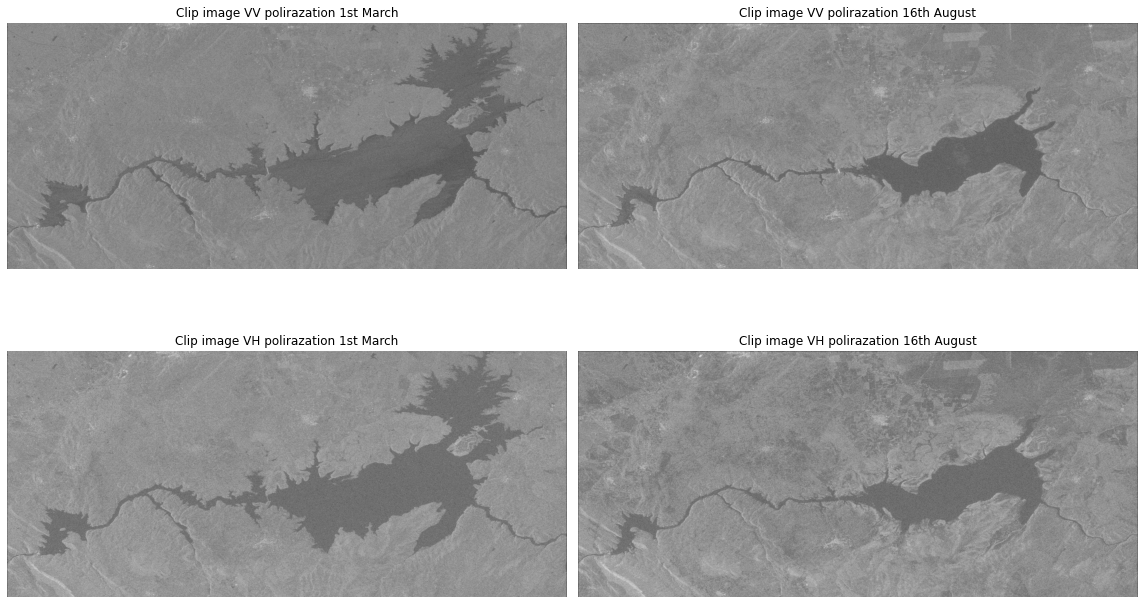

In [4]:
# Specify the paths to the Sentinel-1 image files
image_files = {
    'VV polirazation 1st March':clip_input_image_VV_path_0301,
    'VV polirazation 16th August':clip_input_image_VV_path_0816,
    'VH polirazation 1st March':clip_input_image_VH_path_0301,
    'VH polirazation 16th August': clip_input_image_VH_path_0816
}

# Create a subplot with a 2 by 2 layout
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Loop through the image files and plot them in the subplots
for i, (title, image_file) in enumerate(image_files.items()):
    # Open the image using rasterio
    with rasterio.open(image_file) as src:
        # Read the image as a numpy array
        image_array = src.read(1)

    # Plot the image in the corresponding subplot
    ax = axs[i // 2, i % 2]
    ax.imshow(image_array, cmap='gray')
    ax.set_title(f'Clip image {title}')
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## Speckle filtering of the clipped images

In [5]:
filter_input_image_VV_path_0301 =  speckle_filter(clip_input_image_VV_path_0301)
filter_input_image_VV_path_0816 =  speckle_filter(clip_input_image_VV_path_0816)

filter_input_image_VH_path_0301 =  speckle_filter(clip_input_image_VH_path_0301)
filter_input_image_VH_path_0816 =  speckle_filter(clip_input_image_VH_path_0816)

#### Plots speckle filter

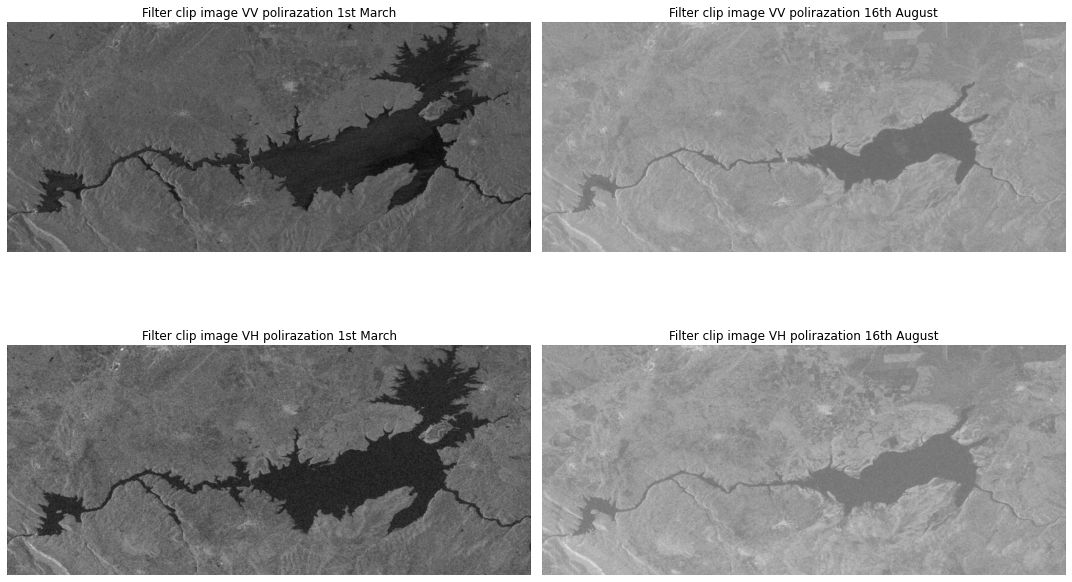

In [6]:

# Specify the paths to the Sentinel-1 image files
image_files = {
    'VV polirazation 1st March':filter_input_image_VV_path_0301,
    'VV polirazation 16th August':filter_input_image_VV_path_0816,
    'VH polirazation 1st March':filter_input_image_VH_path_0301,
    'VH polirazation 16th August': filter_input_image_VH_path_0816
}

# Create a subplot with a 2 by 2 layout
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Loop through the image files and plot them in the subplots
for i, (title, image_file) in enumerate(image_files.items()):
    # Open the image using rasterio
    with rasterio.open(image_file) as src:
        # Read the image as a numpy array
        image_array = src.read(1)

    # Plot the image in the corresponding subplot
    ax = axs[i // 2, i % 2]
    ax.imshow(image_array, cmap='gray')
    ax.set_title(f'Filter clip image {title}')
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## Get water mask

In [7]:
water_threshold_vv = 17 # threshold obtained from visual inspection in QGIS

bitmask_VV_path_0301,area_VV_km2_0301 = get_water_mask(filter_input_image_VV_path_0301, water_threshold_vv)
bitmask_VV_path_0816,area_VV_km2_0816 = get_water_mask(filter_input_image_VV_path_0816, water_threshold_vv)

print('For the VV polarization')
print('The water area found on 03/01/2021 {area} km2'.format(area = round(area_VV_km2_0301,2)))
print('The water area found on 16/08/2021 {area} km2'.format(area = round(area_VV_km2_0816,2)))

difference_VV = area_VV_km2_0301 - area_VV_km2_0816
print('Difference between dates is {difference} km2.'.format(difference = round(difference_VV,2)))

percentage_difference = (difference_VV / area_VV_km2_0301 ) * 100
print('Percentage difference between dates is {percentage_difference}.'.format(percentage_difference = round(percentage_difference,2)))


For the VV polarization
The water area found on 03/01/2021 54.74 km2
The water area found on 16/08/2021 25.65 km2
Difference between dates is 29.09 km2.
Percentage difference between dates is 53.15.


#### Plots VV water mask

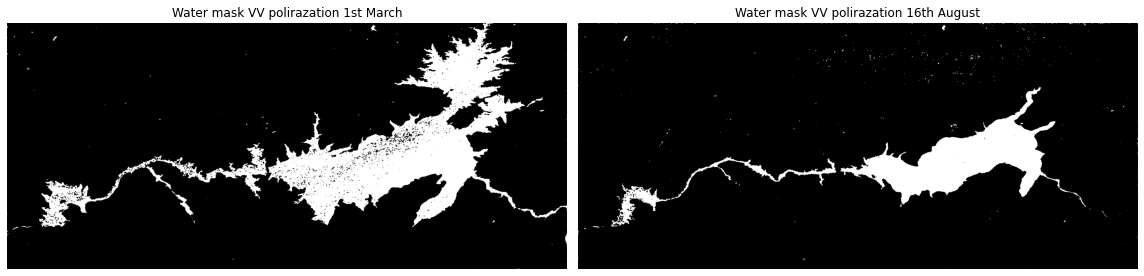

In [8]:
# Specify the paths to the Sentinel-1 image files
image_files = {
    'VV polirazation 1st March':bitmask_VV_path_0301,
    'VV polirazation 16th August':bitmask_VV_path_0816
}
# Create a subplot with a 2 by 2 layout
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

# Loop through the image files and plot them in the subplots
for i, (title, image_file) in enumerate(image_files.items()):
    # Open the image using rasterio
    with rasterio.open(image_file) as src:
        # Read the image as a numpy array
        image_array = src.read(1)

    # Plot the image in the corresponding subplot
    ax = axs[i]
    ax.imshow(image_array, cmap='gray')
    ax.set_title(f'Water mask {title}')
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### VH polarization

In [9]:
water_threshold_vh = 14 # threshold obtained from visual inspection in QGIS

bitmask_VH_path_0301,area_VH_km2_0301 = get_water_mask(filter_input_image_VH_path_0301, water_threshold_vh)
bitmask_VH_path_0816,area_VH_km2_0816 = get_water_mask(filter_input_image_VH_path_0816, water_threshold_vh)
print('For the VH polarization')
print('The water area found on 03/01/2021 {area} km2'.format(area = round(area_VH_km2_0301,2)))
print('The water area found on 16/08/2021 {area} km2'.format(area = round(area_VH_km2_0816,2)))

difference_VV = area_VV_km2_0301 - area_VV_km2_0816
print('Difference between dates is {difference} km2.'.format(difference = round(difference_VV,2)))

percentage_difference = (difference_VV / area_VV_km2_0301 ) * 100
print('Percentage difference between dates is {percentage_difference}.'.format(percentage_difference = round(percentage_difference,2)))

For the VH polarization
The water area found on 03/01/2021 53.85 km2
The water area found on 16/08/2021 25.55 km2
Difference between dates is 29.09 km2.
Percentage difference between dates is 53.15.


#### Plot VH water mask

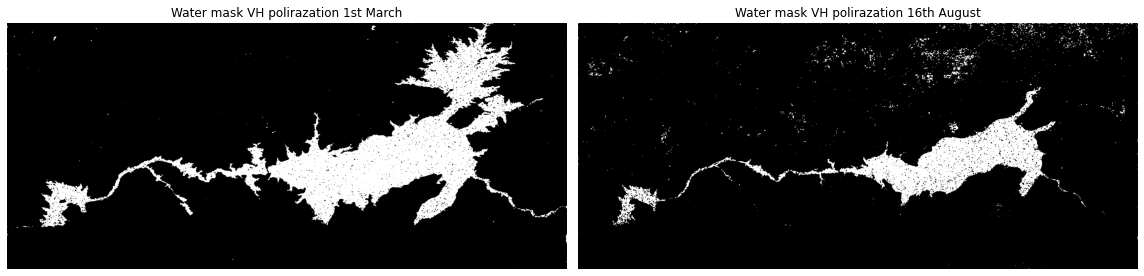

In [10]:
# Specify the paths to the Sentinel-1 image files
image_files = {
    'VH polirazation 1st March':bitmask_VH_path_0301,
    'VH polirazation 16th August':bitmask_VH_path_0816
}
# Create a subplot with a 2 by 2 layout
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

# Loop through the image files and plot them in the subplots
for i, (title, image_file) in enumerate(image_files.items()):
    # Open the image using rasterio
    with rasterio.open(image_file) as src:
        # Read the image as a numpy array
        image_array = src.read(1)

    # Plot the image in the corresponding subplot
    ax = axs[i]
    ax.imshow(image_array, cmap='gray')
    ax.set_title(f'Water mask {title}')
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()